# 601 PROJECT 1

### Dataset Source : https://catalog.data.gov/dataset/vaccines-gov-covid-19-vaccinating-provider-locations/resource/ab31aaf6-8a9f-4dd8-ab49-6813327afb94

### This Anlaysis include following Hypothesis: 
1. How many vaccines instock accepts insurance?,
2. Which state has low no. of insurance acceptance(states) for vaccine?, 
3. what is vaccine quantity last updated month?,Vaccine availability by month, 
4. Vaccine level occurences,
5. Vaccine availability by month 
6. plotting vaccine provider locations using latitude and longitude
7. corelation between columns

In [2]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=9d7f7483bf582b661ee1d43a14d1da37cbe252c1105e1cdf1db378bc1186593f
  Stored in directory: c:\users\kavya raavi\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


### Downloading Dataset

In [3]:
import opendatasets as od                                #importing opendatasets
                                                         #downloading dataset from the URL
download_url = 'https://data.cdc.gov/api/views/5jp2-pgaw/rows.csv?accessType=DOWNLOAD'
    
file=od.download(download_url)                                              #storing downloaded dataset to file

140787712it [00:19, 7244838.22it/s] 


In [7]:
import pandas as pd                                   #importing pandas
df=pd.read_csv(r'Vaccines.gov__COVID-19_vaccinating_provider_locations.csv')  #reading downloaded dataset using dataframes as df
df.head()           #displays top5 values from dataset

,provider_location_guid,loc_store_no,loc_phone,loc_name,loc_admin_street1,loc_admin_street2,loc_admin_city,loc_admin_state,loc_admin_zip,sunday_hours,...,provider_notes,ndc,med_name,in_stock,supply_level,quantity_last_updated,latitude,longitude,Category,Unnamed Column
0,bfdb7bb9-ce54-47c4-8be4-c2fb16a4942a,Not applicable,318-335-0973,"Lake Are Home Health Agency, Inc. [[HOME HEALT...",114 North 11th Street,NaN,Oakdale,LA,71463,NaN,...,NaN,80777-0273-10,"Moderna, COVID-19 Vaccine, 100mcg/0.5mL 10 dose",True,-1,2021-07-08,30.816047,-92.660661,covid,NaN
1,9fc4cb89-af3d-4f5d-8305-6a90a6355eb4,Not applicable,(540) 465-5001,Strasburg Pharmacy,"33820 old Valley Pike,",Unit 7,STRASBURG,VA,22657,Closed,...,NaN,59267-1000-01,"Pfizer-BioNTech, COVID-19 Vaccine, 30 mcg/0.3mL",False,0,2021-05-11,39.004413,-78.339107,covid,NaN
2,8a85b26f-6fde-4c8c-8f33-2ef3bf266950,36102,614-410-2814,The Little Clinic #36102,199 Graceland Blvd.,NaN,Columbus,OH,43214-1529,NaN,...,NaN,80777-0273-10,"Moderna, COVID-19 Vaccine, 100mcg/0.5mL 10 doses",False,0,2021-07-24,40.065076,-83.025550,covid,NaN
3,1e788029-ad56-4425-b8a7-7bf024e83f37,Not applicable,(478) 333-6767,Benzer Pharmacy,150 S. Houston Lake Road,Suite 300,Warner Robins,GA,31088,NaN,...,NaN,59676-0580-05,"Janssen, COVID-19 Vaccine, 0.5 mL",True,4,2021-08-10,32.614527,-83.679677,covid,NaN
4,56027f01-3610-47ce-a4a4-d20109008a56,Not applicable,NaN,HOWARD BROWN HEALTH - ROGERS PARK,6500 N CLARK ST,NaN,CHICAGO,IL,60626-4097,NaN,...,NaN,80777-0273-10,"Moderna, COVID-19 Vaccine, 100mcg/0.5mL 10 dose",False,0,2021-08-11,41.999971,-87.671598,covid,NaN


## DATA CLEANING

In [8]:
Nullcheck = df.isnull().sum()    #checking how many null values are present in dataset by column
Nullcheck

provider_location_guid         0
loc_store_no                   0
loc_phone                   1861
loc_name                       0
loc_admin_street1             15
loc_admin_street2         204972
loc_admin_city                 0
loc_admin_state                0
loc_admin_zip                  0
sunday_hours               70731
monday_hours               41578
tuesday_hours              41064
wednesday_hours            40980
thursday_hours             41114
friday_hours               41861
saturday_hours             56956
web_address                44393
pre_screen                 62085
insurance_accepted         50591
walkins_accepted           39797
provider_notes            111393
ndc                            0
med_name                       0
in_stock                       0
supply_level                   0
quantity_last_updated          0
latitude                      40
longitude                     40
Category                       0
Unnamed Column            280703
dtype: int

In [9]:
#Filling the missing values in dataset with 0.               #filling out missing values in columns
df.fillna({'loc_phone':'0', 'Unnamed Column':'0'},inplace=True)

In [10]:
df1=df.drop_duplicates(keep='first')   #removing duplicates from the dataset

In [11]:
print(df.shape) #After checking for duplicates           #printing the shape of datasets which gives number of columns and rows
print(df1.shape) #Before checking for duplicates     
#so here columns and rows were same before and after. So there are no duplicate values

(280703, 30)
(280703, 30)


In [12]:
print(df1.isnull().sum())    

provider_location_guid         0
loc_store_no                   0
loc_phone                      0
loc_name                       0
loc_admin_street1             15
loc_admin_street2         204972
loc_admin_city                 0
loc_admin_state                0
loc_admin_zip                  0
sunday_hours               70731
monday_hours               41578
tuesday_hours              41064
wednesday_hours            40980
thursday_hours             41114
friday_hours               41861
saturday_hours             56956
web_address                44393
pre_screen                 62085
insurance_accepted         50591
walkins_accepted           39797
provider_notes            111393
ndc                            0
med_name                       0
in_stock                       0
supply_level                   0
quantity_last_updated          0
latitude                      40
longitude                     40
Category                       0
Unnamed Column                 0
dtype: int

In [13]:
#dropping unwanted columns
drop_cols=['Unnamed Column','provider_notes','loc_admin_street2','web_address','pre_screen']
df=df.drop(drop_cols,axis=1)

In [14]:
print(df.isnull().sum())

provider_location_guid        0
loc_store_no                  0
loc_phone                     0
loc_name                      0
loc_admin_street1            15
loc_admin_city                0
loc_admin_state               0
loc_admin_zip                 0
sunday_hours              70731
monday_hours              41578
tuesday_hours             41064
wednesday_hours           40980
thursday_hours            41114
friday_hours              41861
saturday_hours            56956
insurance_accepted        50591
walkins_accepted          39797
ndc                           0
med_name                      0
in_stock                      0
supply_level                  0
quantity_last_updated         0
latitude                     40
longitude                    40
Category                      0
dtype: int64


In [15]:
df.dropna(axis=0,inplace=True)    #dropping values which have null values

In [16]:
print(df.isnull().sum())     #checking for any null values

provider_location_guid    0
loc_store_no              0
loc_phone                 0
loc_name                  0
loc_admin_street1         0
loc_admin_city            0
loc_admin_state           0
loc_admin_zip             0
sunday_hours              0
monday_hours              0
tuesday_hours             0
wednesday_hours           0
thursday_hours            0
friday_hours              0
saturday_hours            0
insurance_accepted        0
walkins_accepted          0
ndc                       0
med_name                  0
in_stock                  0
supply_level              0
quantity_last_updated     0
latitude                  0
longitude                 0
Category                  0
dtype: int64


In [17]:
df1=df.drop_duplicates(keep='first')   #dropping duplicates again to make sure they are none

In [18]:
print(df.shape) #After checking for duplicates
print(df1.shape) #Before checking for duplicates

(203388, 25)
(203388, 25)


### Exploratory Data Analysis

,in_stock,supply_level,latitude,longitude
in_stock,1.000000,0.450966,0.039105,-0.029545
supply_level,0.450966,1.000000,-0.065508,0.014003
latitude,0.039105,-0.065508,1.000000,0.027928
longitude,-0.029545,0.014003,0.027928,1.000000


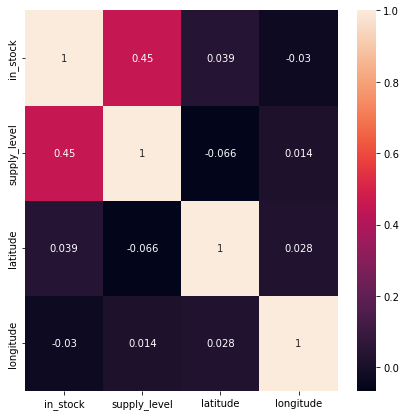

In [19]:
#this indicates supply level and vaccines that are in stock by longitude and latitude.
import matplotlib.pyplot as plt  
import seaborn as sns   
plt.figure(figsize=(7,7))
cor= df.corr(method='pearson', min_periods=2)
sns.heatmap(cor,annot=True)
sns.color_palette("bright")
cor
#here we are getting corelation between columns, negative value indicates they are inversly proportional and positive value
#indicates they are proportional
#strongest corelation here is supplylevel and instock.

<AxesSubplot:xlabel='in_stock', ylabel='insurance_accepted'>

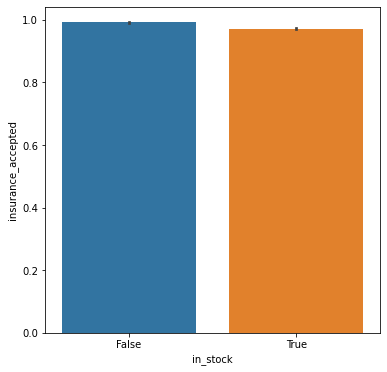

In [20]:
#Question: How many vaccines instock accepts insurance
#Answer: Around 95% of vaccines that are instock accepts insurance.
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (6,6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y="insurance_accepted", x="in_stock",data=df)

#reference: https://seaborn.pydata.org/

<AxesSubplot:xlabel='loc_admin_state', ylabel='insurance_accepted'>

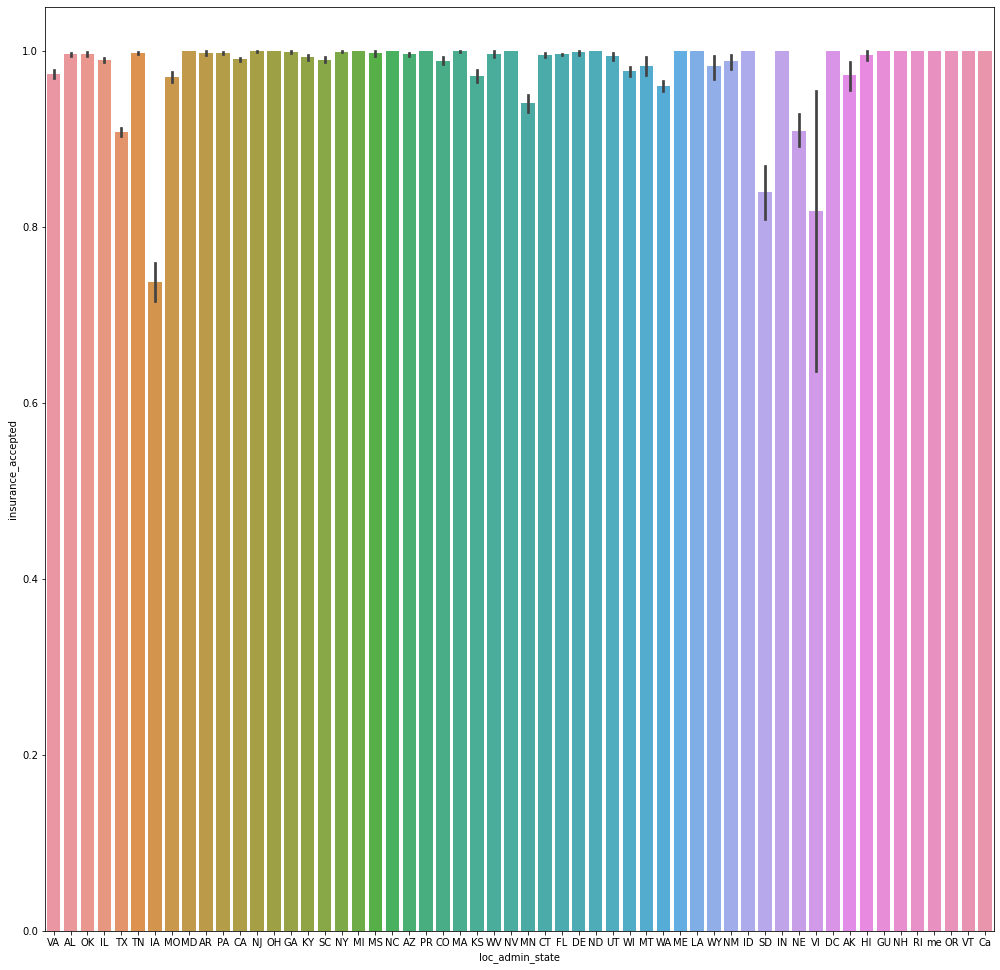

In [21]:
#Question: Which state has low no. of insurance acceptance(states) for vaccine
#lowa has low insurance acceptance places
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (17,17)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y="insurance_accepted", x="loc_admin_state",data=df)

#Extracting the date from timestamp and plotting vaccine quantity by last updated month

In [22]:
dates = pd.to_datetime(df['quantity_last_updated'], format='%Y/%m/%d')  #extracting dates from timestamp
dates

1        2021-05-11
6        2021-04-30
7        2021-06-07
17       2021-07-16
21       2021-08-27
            ...    
280695   2022-01-07
280696   2022-01-07
280698   2022-01-07
280699   2022-01-06
280702   2022-01-06
Name: quantity_last_updated, Length: 203388, dtype: datetime64[ns]

In [23]:
dates.dt.month   #extracting month from date

1         5
6         4
7         6
17        7
21        8
         ..
280695    1
280696    1
280698    1
280699    1
280702    1
Name: quantity_last_updated, Length: 203388, dtype: int64

<AxesSubplot:xlabel='quantity_last_updated', ylabel='Count'>

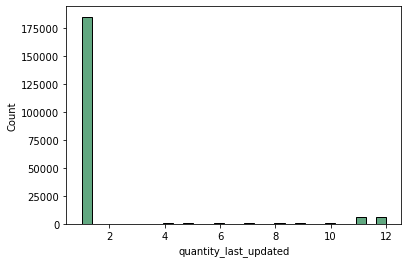

In [24]:
#this represents vaccine quantity last updated month
#Question: In which month of the year, vaccine quantity is updated.
sns.histplot(dates.dt.month,bins=30,color = "seagreen")
#Answer: Mostly vaccine updation accoured in month of october.

Text(0.5, 1.0, 'Vaccine name and supply level')

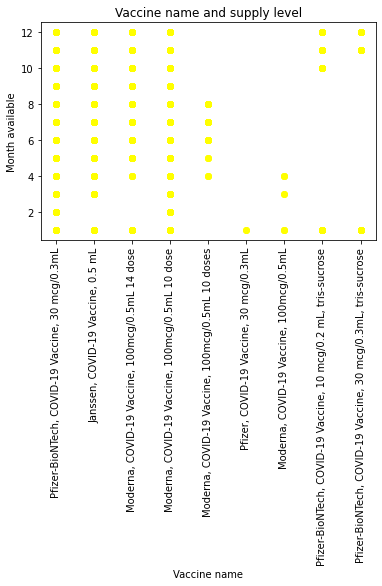

In [25]:
#Question : Vaccine availability by month

plt.scatter(df['med_name'], dates.dt.month, c='yellow')
plt.tick_params(axis='x', labelrotation = 90)
plt.xlabel('Vaccine name')
plt.ylabel('Month available')
plt.title('Vaccine name and supply level')

#Answer : Vaccine availability for moderna 10doses is available throughout the year.

Text(0.5, 1.0, 'Histogram for Vaccine supply level')

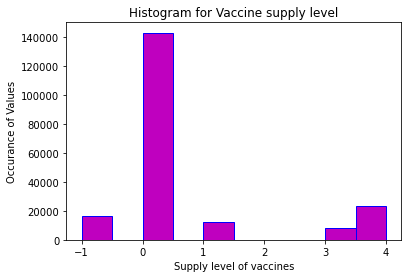

In [26]:
#Vaccine level occurences
plt.hist(df['supply_level'], facecolor='m',edgecolor='blue')
plt.xlabel('Supply level of vaccines')
plt.ylabel('Occurance of Values')
plt.title('Histogram for Vaccine supply level')
#4level means here vaccines availability is more
#3 level indicates vaccines availability is little less
#2 level imdicates vaccines availability is less
#1 level indicates vaccines availability is very less
#0 level indicates vaccines availability is zero
#-1 indicates that there is requirement but no vaccines

#4th level means here vaccines availability is more
#3rd level indicates vaccines availability is little less
#2nd level imdicates vaccines availability is less
#1st level indicates vaccines availability is very less
#0th level indicates vaccines availability is zero
#-1  level indicates that there is requirement but no vaccines

Text(0.5, 1.0, 'Month and supply level')

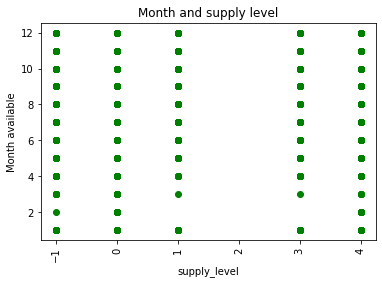

In [27]:
#Question : Vaccine availability by month

plt.scatter(df['supply_level'], dates.dt.month, c='green')
plt.tick_params(axis='x', labelrotation = 90)
plt.xlabel('supply_level')
plt.ylabel('Month available')
plt.title('Month and supply level')

#Answer : Vaccine availability for moderna 10doses is available throughout.
# 4- sufficient 

In [28]:
df.latitude       #getting latitude values from dataset

1         39.004413
6         33.408345
7         36.287200
17        41.768401
21        26.138697
            ...    
280695    40.861296
280696    25.763943
280698    39.411016
280699    41.667150
280702    40.939387
Name: latitude, Length: 203388, dtype: float64

In [29]:
df.longitude   #getting longitude values from dataset

1        -78.339107
6        -86.631212
7        -97.285404
17       -87.653412
21       -97.627494
            ...    
280695   -73.987881
280696   -80.263930
280698   -76.948750
280699   -72.805849
280702   -74.118637
Name: longitude, Length: 203388, dtype: float64

#plotting vaccine provider locations by latitude and longitude

In [30]:
sample_df = df.sample(int(0.1 * len(df)))         

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

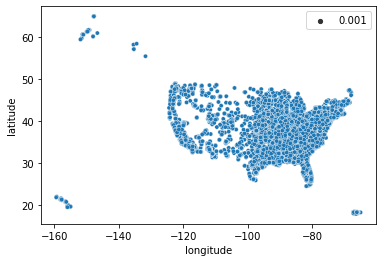

In [31]:
sns.scatterplot(x=sample_df.longitude, y=sample_df.latitude, size=0.001)      
#plotting locations using latitude and longitude

#as the above plotting is not that clearly understandable. used heat map to plot the same

In [34]:
import folium                    #importing folium 
lat,lon= df.latitude[0], df.longitude[0]
lat,lon

ModuleNotFoundError: No module named 'folium'

In [33]:
for x in df[['latitude', 'longitude']].sample(100).iteritems(): #iterating through all the longitude and latitude values to plot
    print(x[1])

25026     44.217042
99938     26.095685
230626    40.625418
57998     32.751129
79236     39.694915
            ...    
112310    42.959091
109955    39.290274
232275    40.153670
24586     35.939024
103374    30.439147
Name: latitude, Length: 100, dtype: float64
25026     -72.564940
99938     -97.165137
230626    -73.962017
57998    -117.210103
79236    -104.788742
             ...    
112310    -78.859220
109955    -77.201892
232275    -74.973937
24586     -91.547007
103374    -88.898192
Name: longitude, Length: 100, dtype: float64


In [34]:
zip(list(df.latitude), list(df.longitude))   

In [35]:
from folium.plugins import HeatMap   #importing heat map from folium

In [36]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.latitude), list(sample_df.longitude)))  
#creating pairs of longitude and longitude and adding them to map

In [37]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)          #adding longitude and latitude values to map to create heat map.
map
